# Markow Chains

In [1]:
reset -fs

### Project revenues for the next 10 years.

### Discount rate: 10%

### What would be the value of the customer base in 2025.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('purchases.txt', sep="\t", header=None, names=['customer_id', 'purchase_amount', 'date_purchase'])

In [4]:
df.head()

,customer_id,purchase_amount,date_purchase
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [5]:
df.shape

(51243, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 3 columns):
customer_id        51243 non-null int64
purchase_amount    51243 non-null float64
date_purchase      51243 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ MB


In [7]:
df['date_purchase'] =  pd.to_datetime(df['date_purchase'])

In [8]:
df['year_purchase'] = df['date_purchase'].apply(lambda x: x.year)

In [9]:
df.head()

,customer_id,purchase_amount,date_purchase,year_purchase
0,760,25.0,2009-11-06,2009
1,860,50.0,2012-09-28,2012
2,1200,100.0,2005-10-25,2005
3,1420,50.0,2009-07-09,2009
4,1940,70.0,2013-01-25,2013


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 4 columns):
customer_id        51243 non-null int64
purchase_amount    51243 non-null float64
date_purchase      51243 non-null datetime64[ns]
year_purchase      51243 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.6 MB


In [11]:
df.customer_id.value_counts()

9720      45
109370    41
119430    38
10720     37
10640     34
1420      34
116310    29
81640     28
6750      28
57390     27
6870      27
71350     26
117460    26
9830      26
6690      25
125500    24
11740     23
105870    23
9090      23
9790      22
5990      22
10930     22
15160     22
13290     22
2720      21
53070     21
9360      21
150330    21
139310    21
95830     21
          ..
204040     1
80080      1
198870     1
105720     1
257270     1
84190      1
178400     1
7400       1
158950     1
252140     1
235780     1
232730     1
175390     1
224550     1
163140     1
227480     1
138600     1
256170     1
261460     1
186540     1
211120     1
141490     1
73000      1
220480     1
113980     1
71860      1
2230       1
170180     1
15660      1
176090     1
Name: customer_id, dtype: int64

In [12]:
df.groupby('date_purchase')['customer_id'].count()

date_purchase
2005-01-02      3
2005-01-04      2
2005-01-06      3
2005-01-07      7
2005-01-08      4
2005-01-10      4
2005-01-12      2
2005-01-13      5
2005-01-14      4
2005-01-15      2
2005-01-16      1
2005-01-18      5
2005-01-19      4
2005-01-20      6
2005-01-21      9
2005-01-23      2
2005-01-25      2
2005-01-26      2
2005-01-27      2
2005-01-29      1
2005-01-30      2
2005-02-01      1
2005-02-02      1
2005-02-04      1
2005-02-06      1
2005-02-08      1
2005-02-11      1
2005-02-12      1
2005-02-15      1
2005-03-02      1
             ... 
2015-12-02     62
2015-12-03     19
2015-12-04     31
2015-12-05     25
2015-12-06     10
2015-12-07      4
2015-12-08     77
2015-12-09     45
2015-12-10     58
2015-12-11     28
2015-12-12      7
2015-12-13      2
2015-12-14      2
2015-12-15     25
2015-12-16      6
2015-12-17    200
2015-12-18     28
2015-12-19    105
2015-12-20      2
2015-12-21      7
2015-12-22     22
2015-12-23    111
2015-12-24     90
2015-12-25    

In [13]:
df.groupby('date_purchase')['purchase_amount'].sum()

date_purchase
2005-01-02      140.00
2005-01-04       50.00
2005-01-06      270.00
2005-01-07      430.00
2005-01-08      300.00
2005-01-10      145.00
2005-01-12      253.36
2005-01-13      160.00
2005-01-14      305.00
2005-01-15       85.00
2005-01-16       10.00
2005-01-18      433.45
2005-01-19      210.00
2005-01-20      200.00
2005-01-21      295.00
2005-01-23       70.00
2005-01-25       80.00
2005-01-26      180.00
2005-01-27       60.00
2005-01-29       25.00
2005-01-30       90.00
2005-02-01       30.00
2005-02-02       50.00
2005-02-04       60.00
2005-02-06       75.00
2005-02-08       30.00
2005-02-11       50.00
2005-02-12       30.00
2005-02-15       30.00
2005-03-02       30.00
                ...   
2015-12-02     4347.00
2015-12-03     1255.00
2015-12-04     3525.00
2015-12-05     1255.00
2015-12-06      945.00
2015-12-07      310.00
2015-12-08     5752.00
2015-12-09     2925.00
2015-12-10     6920.00
2015-12-11     2220.00
2015-12-12      785.00
2015-12-13      320.

In [14]:
max(df['date_purchase']) - min(df['date_purchase'])

Timedelta('4015 days 00:00:00')

In [15]:
print("Number of years of data: ", 4015/365)

Number of years of data:  11.0


In [16]:
df.groupby('year_purchase')['customer_id'].count()

year_purchase
2005    1470
2006    2182
2007    4674
2008    4331
2009    5054
2010    4939
2011    4785
2012    5960
2013    5912
2014    5739
2015    6197
Name: customer_id, dtype: int64

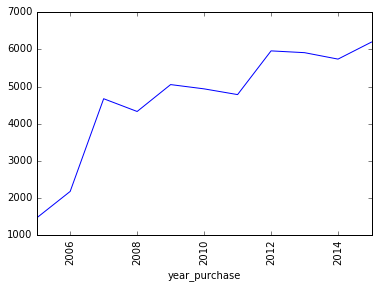

In [17]:
sep_dic_plot = df.groupby('year_purchase').count()['customer_id'].plot(rot=90)
#sep_dic_plot.set(xlabel='Month', ylabel='Users')
#plot_mean = trips_sep_dec.groupby('date').count()['trip_id'].mean()
#plot_std = trips_sep_dec.groupby('date').count()['trip_id'].std()
#sep_dic_plot.axhline(y=plot_mean, color='black')
#sep_dic_plot.axhline(y=plot_mean+plot_std*1.5, color='red', ls='dashed')
#sep_dic_plot.axhline(y=plot_mean-plot_std*1.5, color='red', ls='dashed')
#sep_dic_plot.plot()

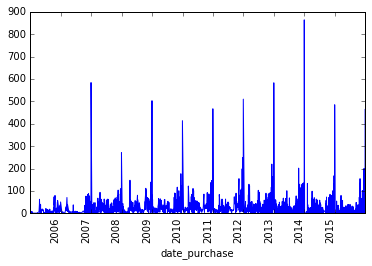

In [18]:
df.groupby('date_purchase').count()['customer_id'].plot(rot=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118d40cc0>]], dtype=object)

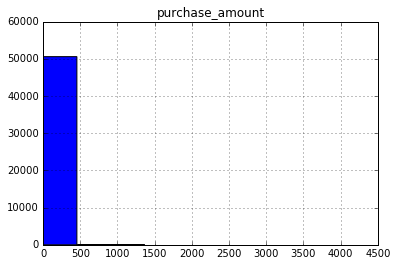

In [19]:
df.hist(column="purchase_amount")